## Import necessary library

In [42]:
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import time
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

folder_path = '/content/drive/My Drive/bank_additional/'

# List all files and subdirectories in the folder
folder_contents = os.listdir(folder_path)

# Print the list of contents
print(folder_contents)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.DS_Store', 'bank_additional.csv', '.Rhistory', 'bank-additional-names.txt', 'bank_additional_full.csv', '.ipynb_checkpoints', 'bank_marketing.ipynb']


In [3]:
#load the CSV file
df = pd.read_csv("/content/drive/My Drive/bank_additional/bank_additional_full.csv", sep=';')
print ('Number of samples: ',len(df))

Number of samples:  41188


In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# df1 = pd.read_csv("/content/drive/My Drive/bank_additional/bank_additional.csv", sep=';')
# print ('Number of samples: ',len(df1))
# df1.head()

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#count the number of rows for each type
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [9]:
df.duplicated().sum()

12

In [10]:
df=df[~df.duplicated()] #removing duplicate rows


In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
# Check the shape of the dataset
print(df.shape)

# Check df_baseline
df.y.value_counts() / len(df.y)

(41176, 21)


y
no     0.887337
yes    0.112663
Name: count, dtype: float64

In [13]:
## The dataset is imbalance

In [14]:
print('Number of columns:',len(df.columns))


Number of columns: 21


In [15]:
# for each column
for a in list(df.columns):

    # get a list of unique values
    n = df[a].unique()

    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

Feature Engineering
Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

Numerical Features
These are numeric data. The numerical columns that we will use can be seen below:

In [16]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [17]:
df[cols_num].head()

campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         1    999         0           1.1          93.994          -36.4   
1         1    999         0           1.1          93.994          -36.4   
2         1    999         0           1.1          93.994          -36.4   
3         1    999         0           1.1          93.994          -36.4   
4         1    999         0           1.1          93.994          -36.4   

   nr.employed  age  euribor3m  
0       5191.0   56      4.857  
1       5191.0   57      4.857  
2       5191.0   37      4.857  
3       5191.0   40      4.857  
4       5191.0   56      4.857

Graphical Representation of Numerical Features

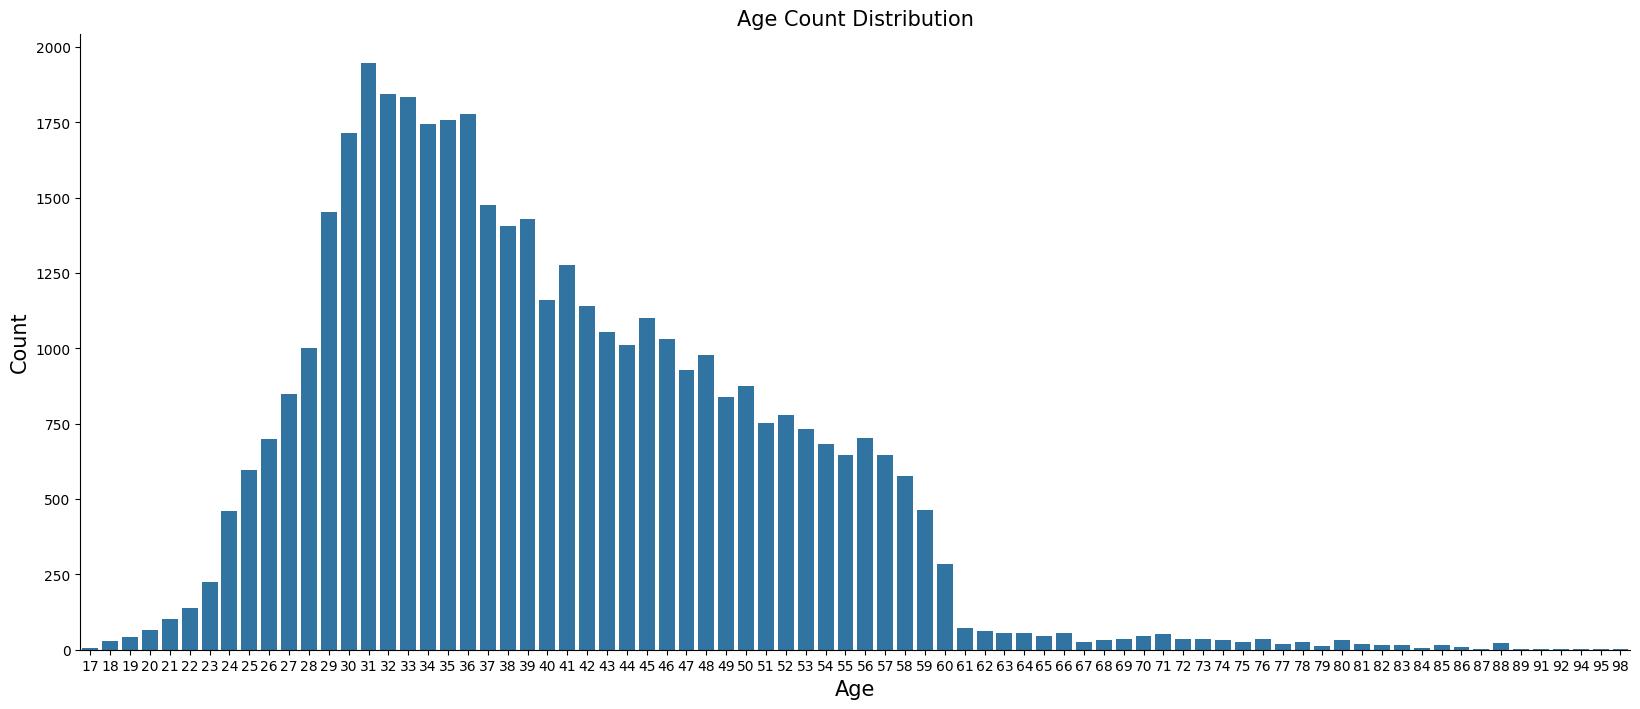

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

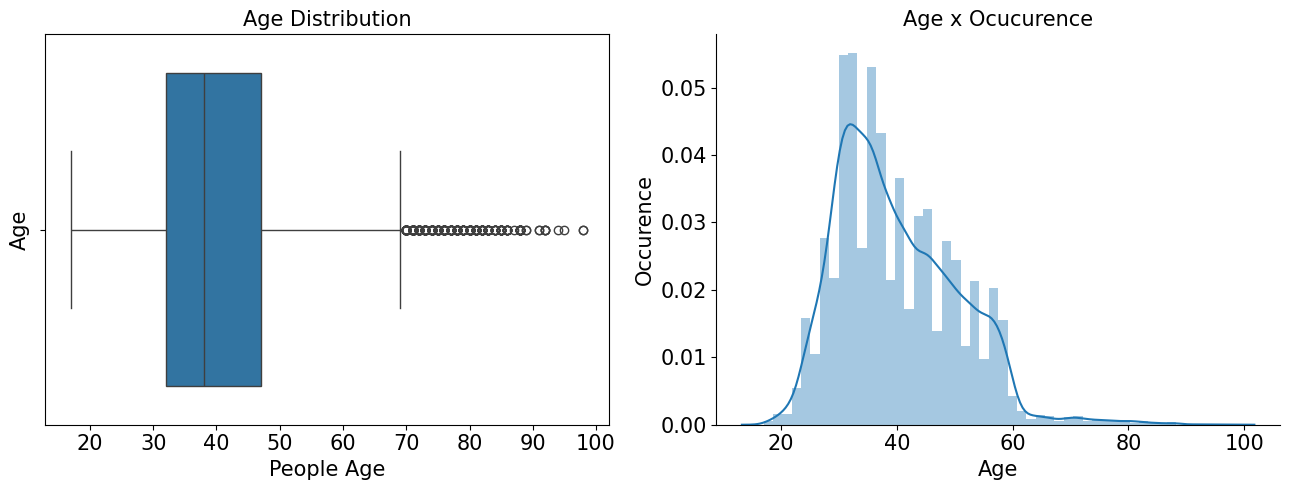

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

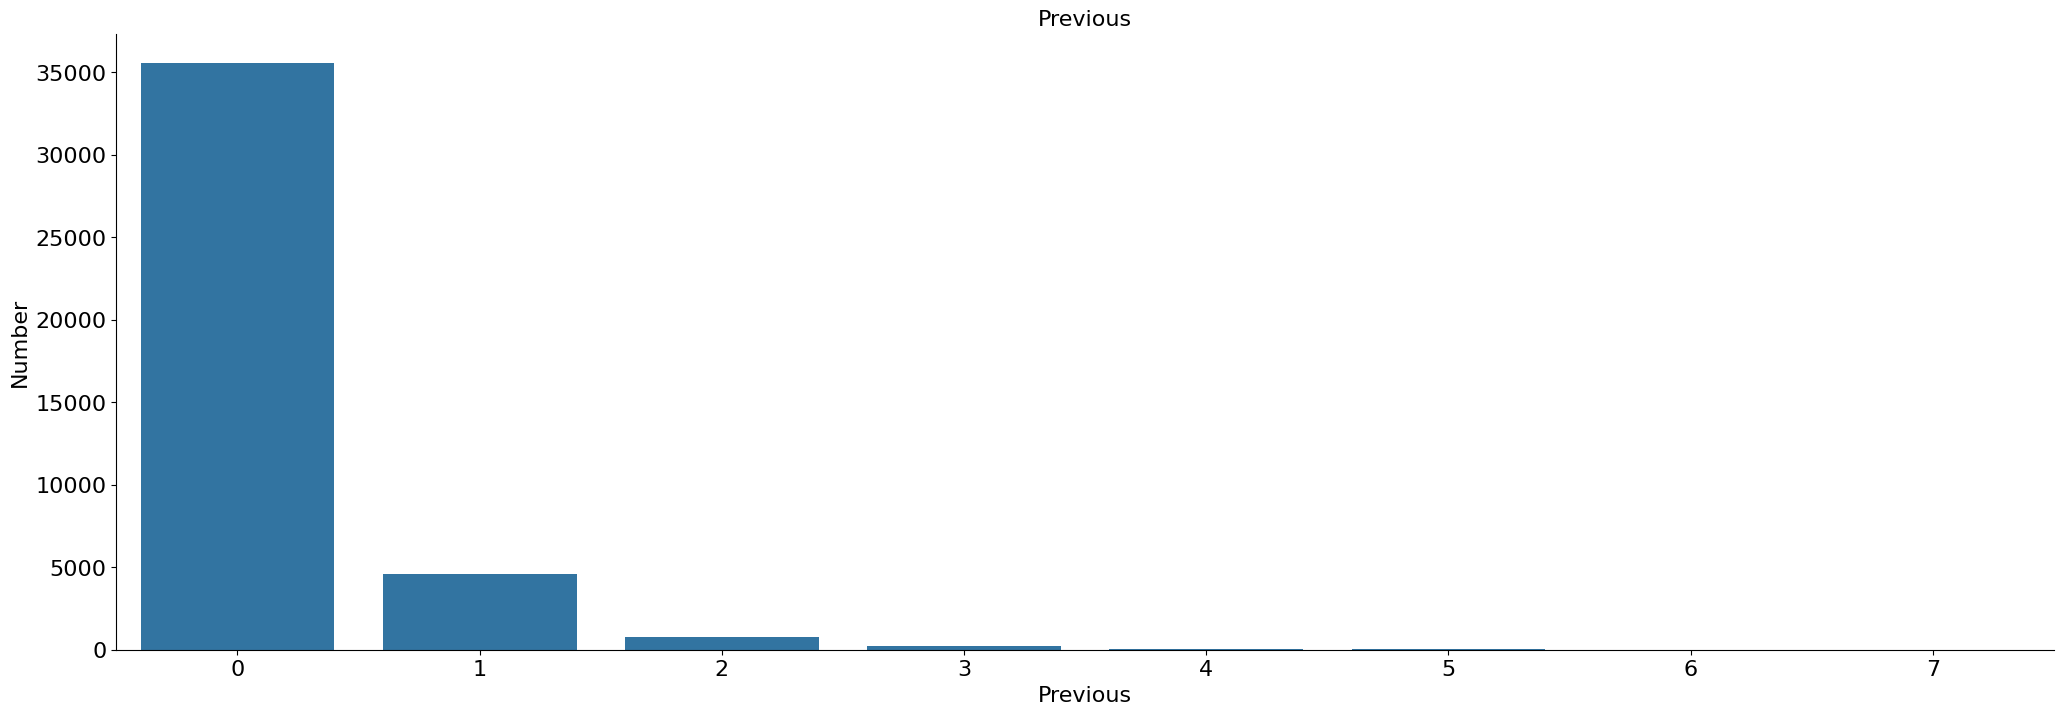

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

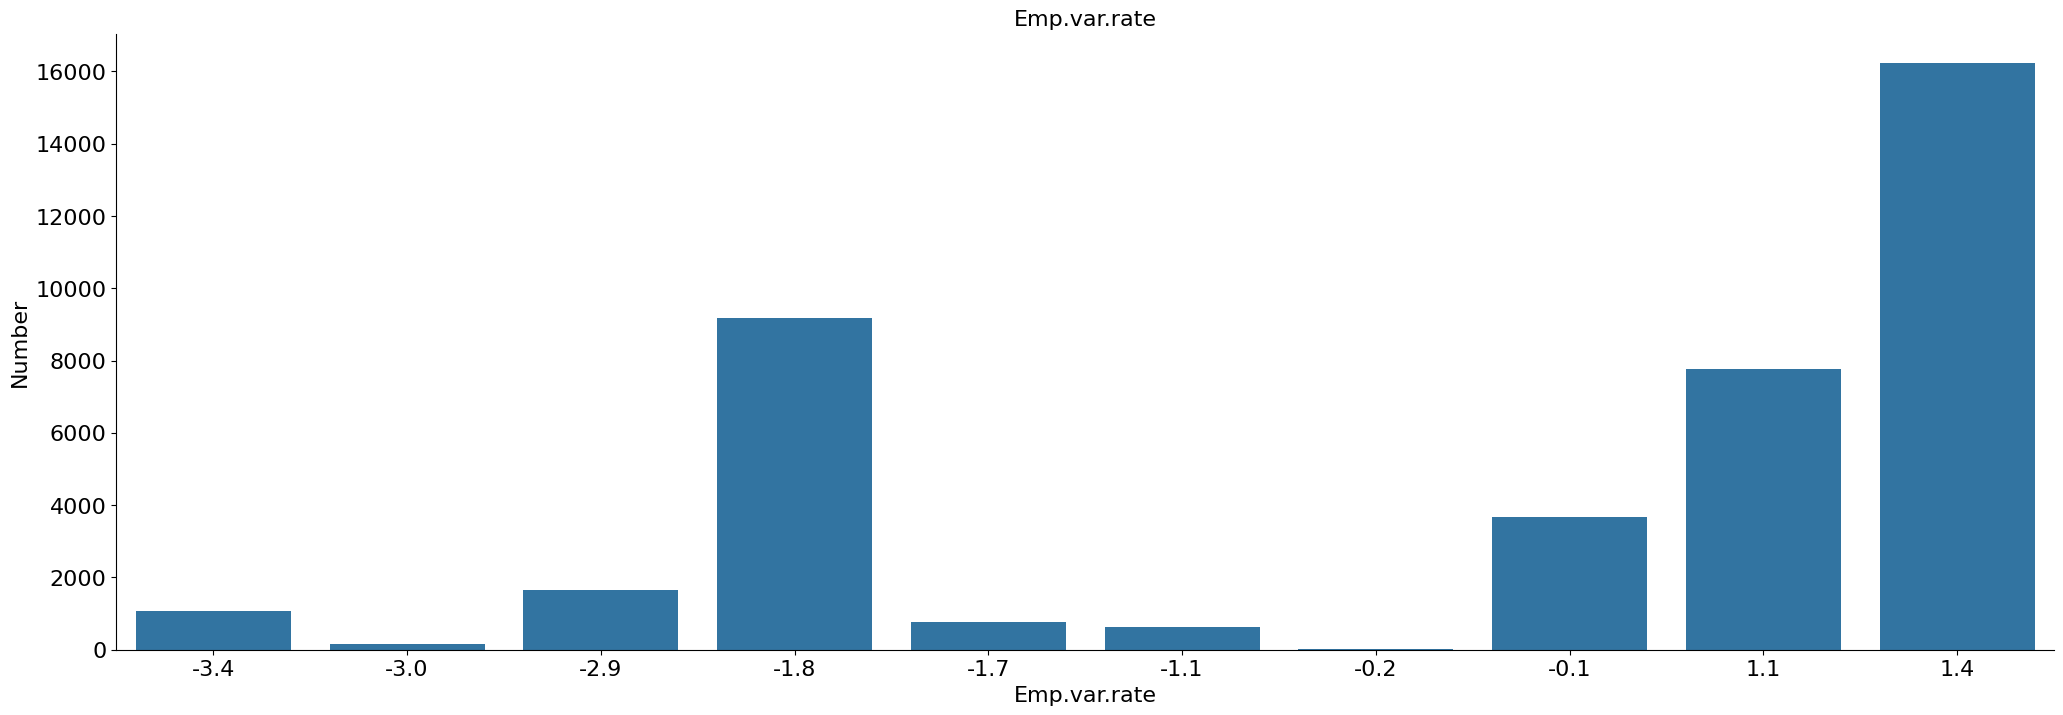

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

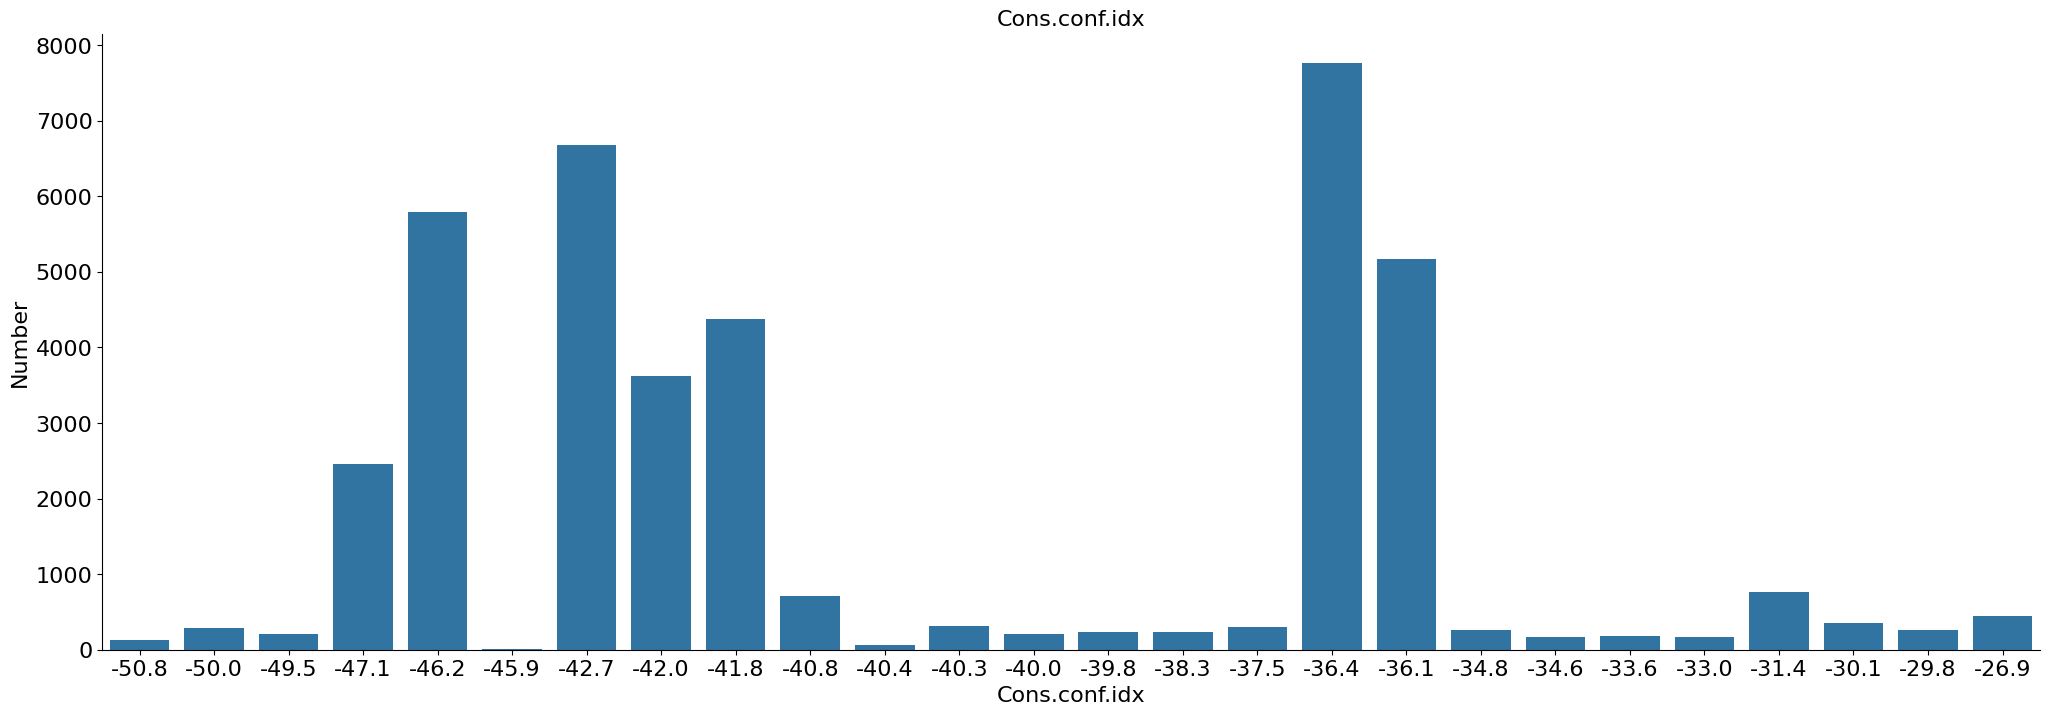

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'cons.conf.idx', data = df[cols_num])
ax.set_xlabel('Cons.conf.idx', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Cons.conf.idx', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Let's check if there are any missing values in the numerical data.

In [23]:
df[cols_num].isnull().sum()


campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

Categorical Features
Categorical variables are non-numeric data such as job and education. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

The first set of categorical data we will deal with are these columns:

In [24]:
cols_cat = ['job', 'marital',
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [25]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

One-Hot Encoding
To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column job, we would create new columns.

In [26]:
cols_cat = ['job', 'marital',
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0       False            False             False           True   
1       False            False             False          False   
2       False            False             False          False   
3        True            False             False          False   
4       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2           False        False              False          True        False   
3           False        False              False         False        False   
4           False        False              False          True        False   

   job_technician  ...  month_oct  month_sep  day_of_week_fri  \
0           False  ...      False      False            False   
1           False  ...      False      False            False   
2           False  ...      False      False            False   
3           False  ...      False      False            False   
4           False  ...      False      False            False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0             True            False            False            False   
1             True            False            False            False   
2             True            False            False            False   
3             True            False            False            False   
4             True            False            False            False   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0             False                  True             False  
1             False                  True             False  
2             False                  True             False  
3             False                  True             False  
4             False                  True             False  

[5 rows x 53 columns]

In [27]:
cols_new_cat = cols_new_cat.astype(int)


In [28]:
cols_new_cat

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              1   
1               0                0                 0              0   
2               0                0                 0              0   
3               1                0                 0              0   
4               0                0                 0              0   
...           ...              ...               ...            ...   
41183           0                0                 0              0   
41184           0                1                 0              0   
41185           0                0                 0              0   
41186           0                0                 0              0   
41187           0                0                 0              0   

       job_management  job_retired  job_self-employed  job_services  \
0                   0            0                  0             0   
1                   0            0                  0             1   
2                   0            0                  0             1   
3                   0            0                  0             0   
4                   0            0                  0             1   
...               ...          ...                ...           ...   
41183               0            1                  0             0   
41184               0            0                  0             0   
41185               0            1                  0             0   
41186               0            0                  0             0   
41187               0            1                  0             0   

       job_student  job_technician  ...  month_oct  month_sep  \
0                0               0  ...          0          0   
1                0               0  ...          0          0   
2                0               0  ...          0          0   
3                0               0  ...          0          0   
4                0               0  ...          0          0   
...            ...             ...  ...        ...        ...   
41183            0               0  ...          0          0   
41184            0               0  ...          0          0   
41185            0               0  ...          0          0   
41186            0               1  ...          0          0   
41187            0               0  ...          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                    0                1                0                0   
1                    0                1                0                0   
2                    0                1                0                0   
3                    0                1                0                0   
4                    0                1                0                0   
...                ...              ...              ...              ...   
41183                1                0                0                0   
41184                1                0                0                0   
41185                1                0                0                0   
41186                1                0                0                0   
41187                1                0                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                    0                 0                     1   
1                    0                 0                     1   
2                    0                 0                     1   
3                    0                 0                     1   
4                    0                 0                     1   
...                ...               ...                   ...   
41183                0                 0                     1   
41184                0                 0                     1   
4

Graphical Representation of Categorical Features

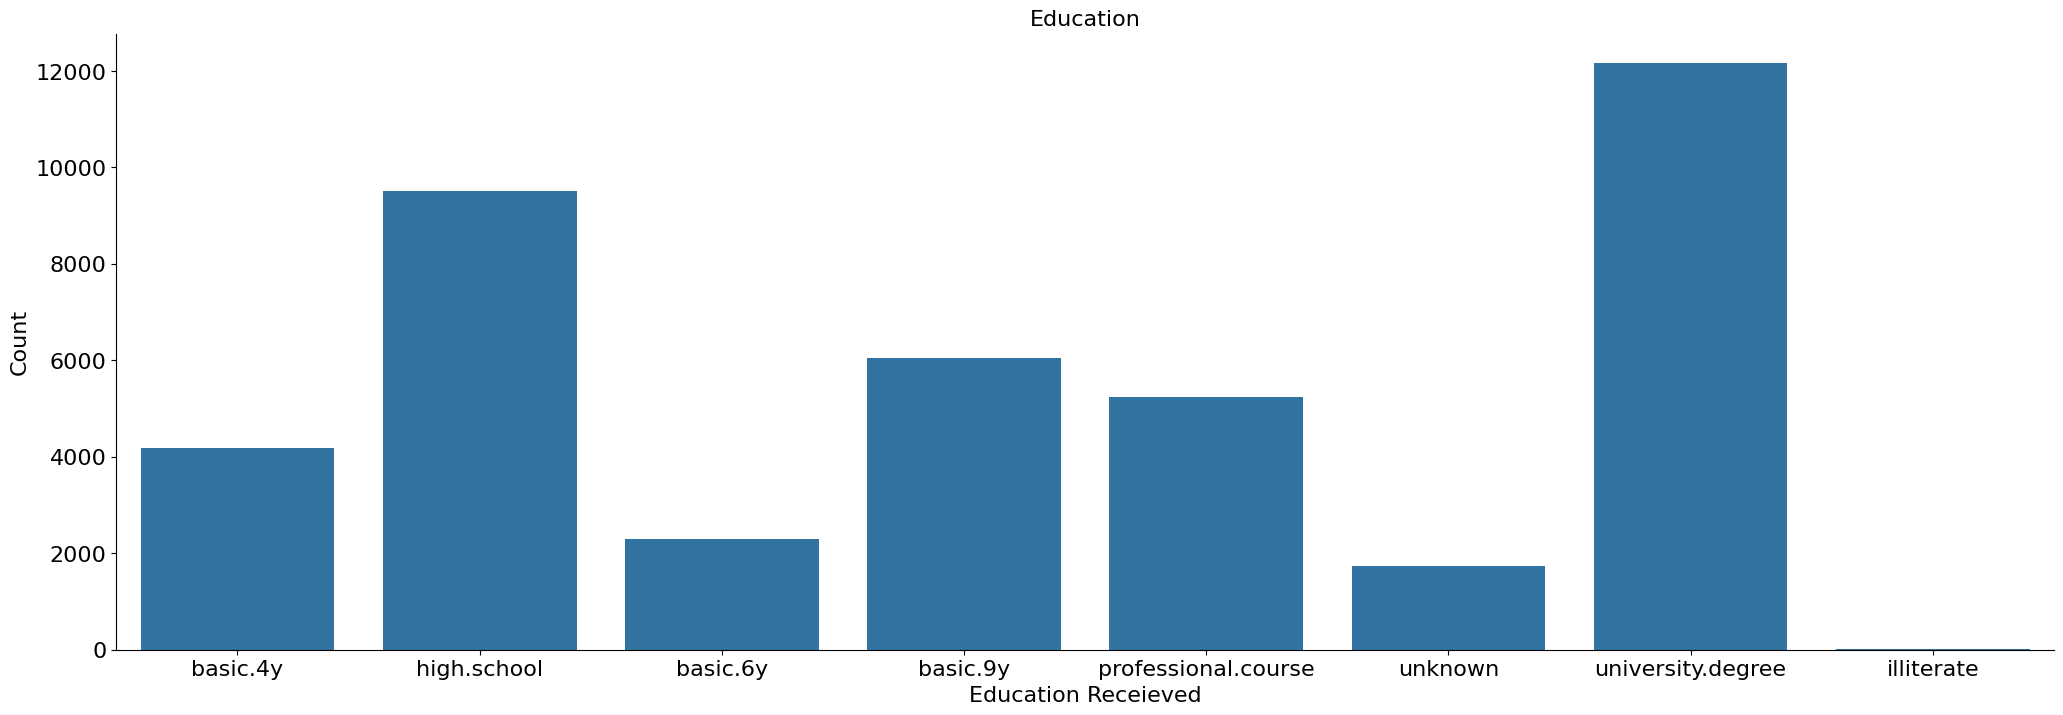

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

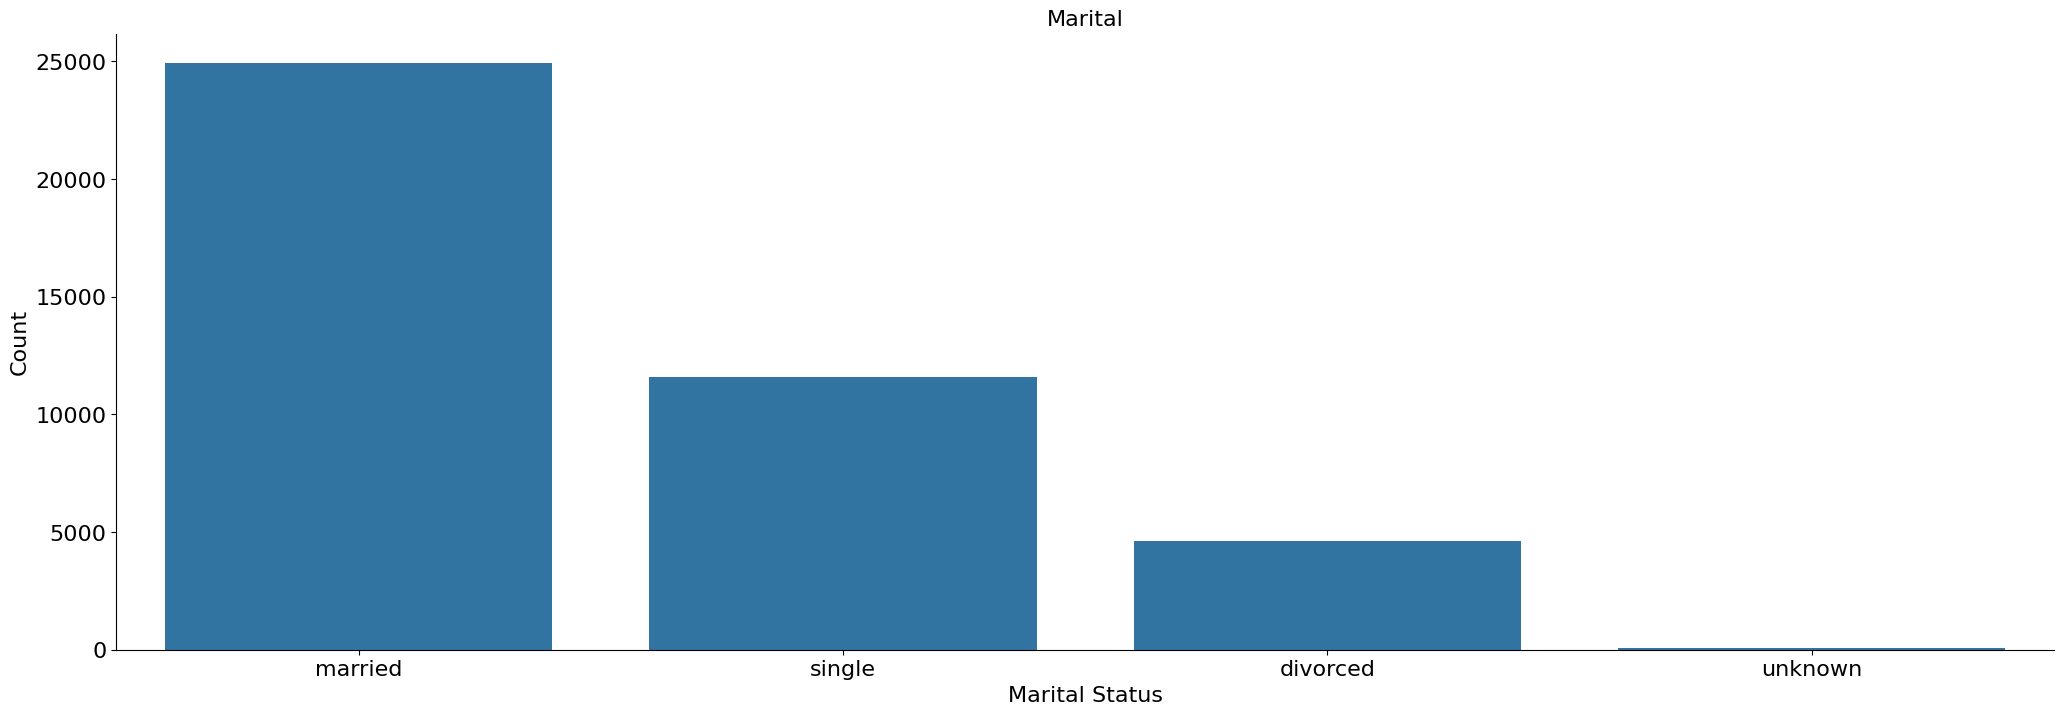

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

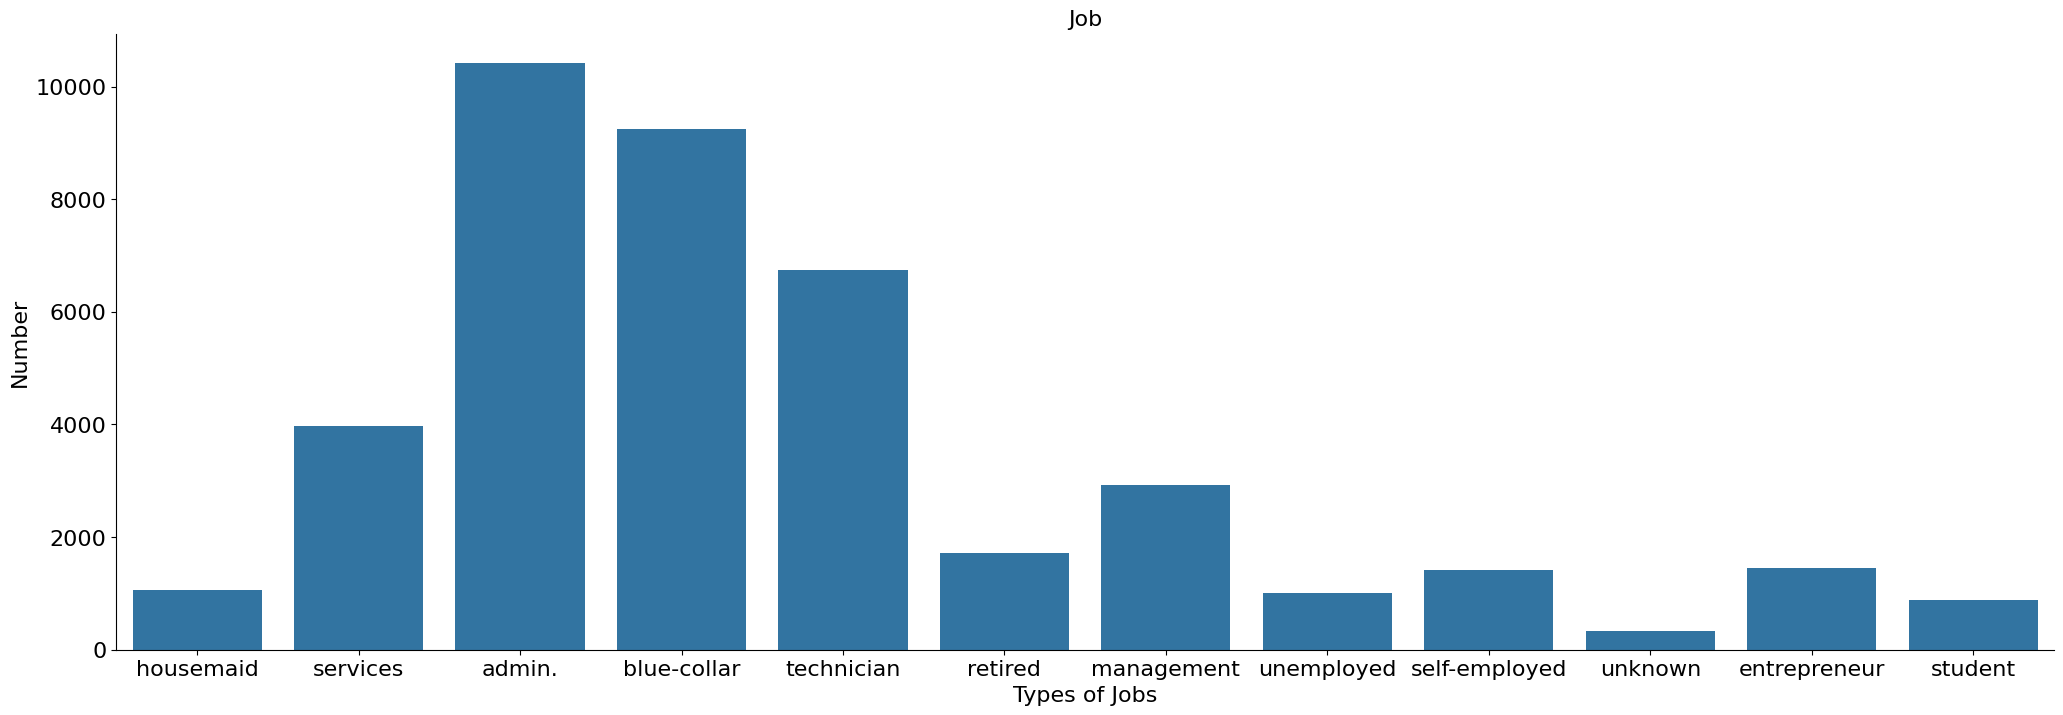

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

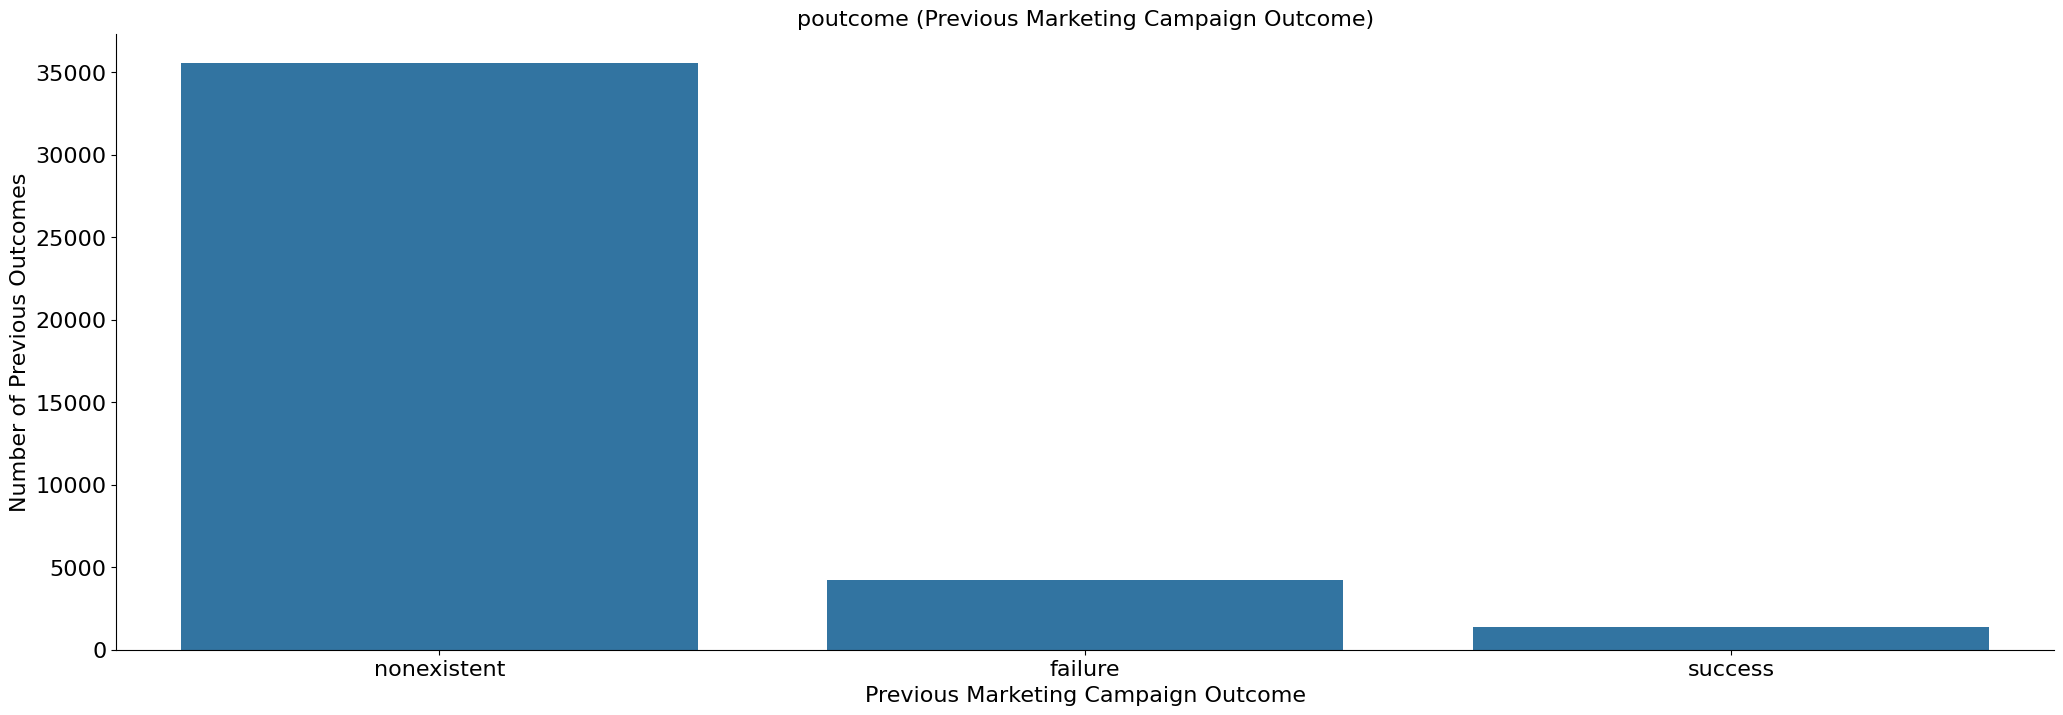

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

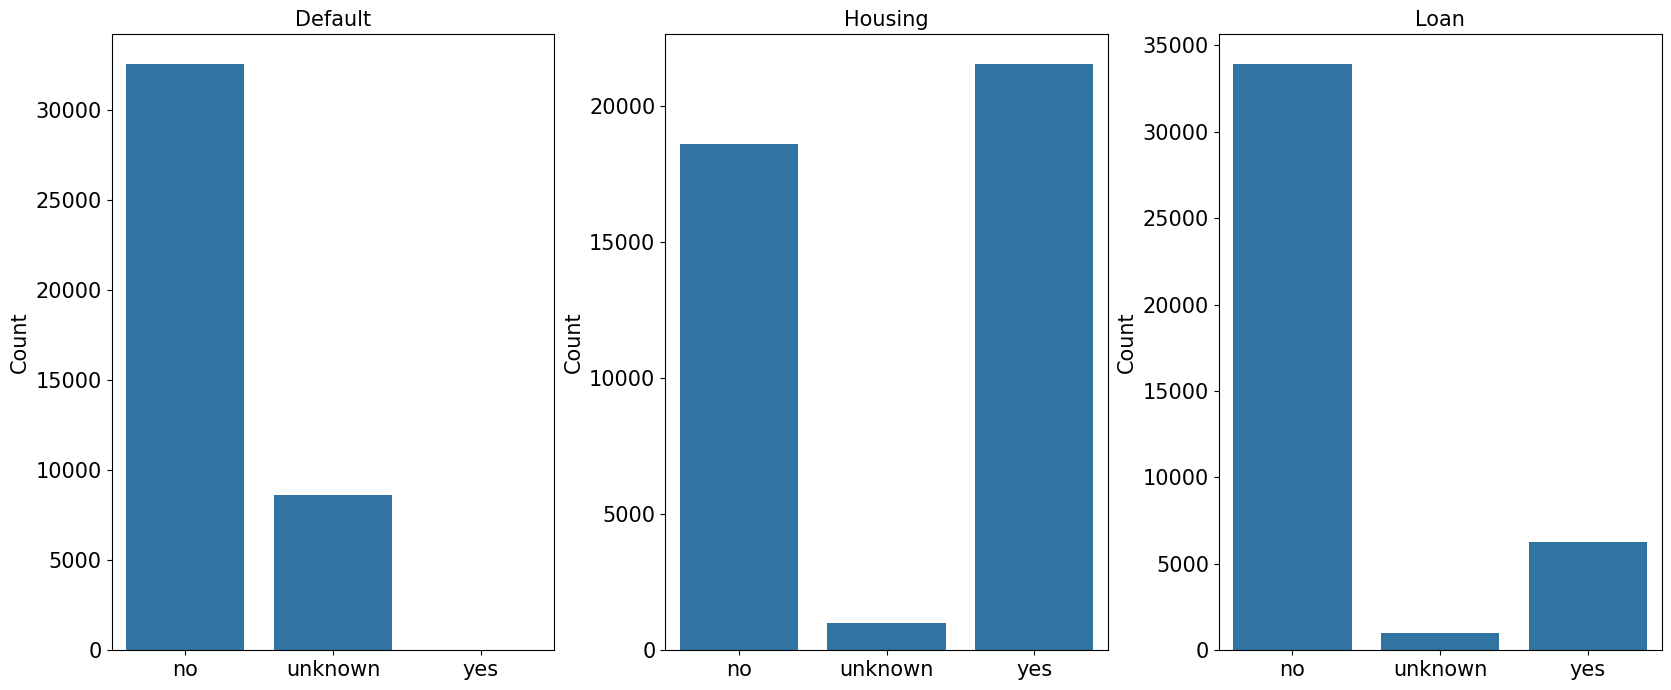

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

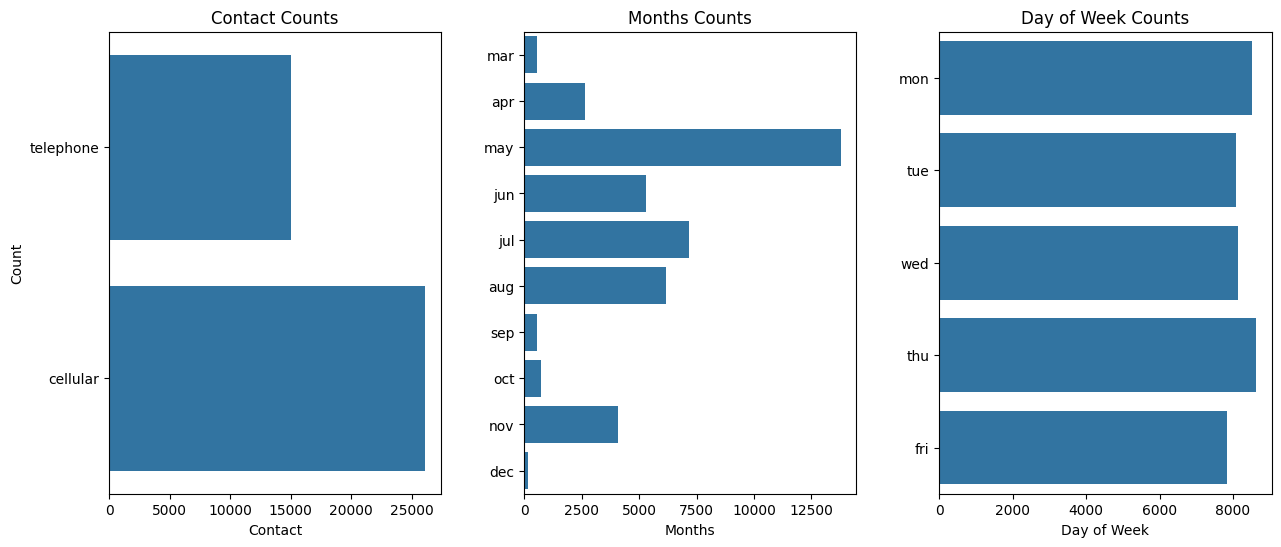

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In order to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns.


In [35]:
df = pd.concat([df,cols_new_cat], axis = 1)



In [36]:
cols_all_cat=list(cols_new_cat.columns)


In [37]:
df[cols_all_cat].head()


job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              1   
1           0                0                 0              0   
2           0                0                 0              0   
3           1                0                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  ...  month_oct  month_sep  day_of_week_fri  \
0               0  ...          0          0                0   
1               0  ...          0          0                0   
2               0  ...          0          0                0   
3               0  ...          0          0                0   
4               0  ...          0          0                0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0                 0                     1                 0  
1                 0                     1                 0  
2                 0                     1                 0  
3                 0                     1                 0  
4                 0                     1                 0  

[5 rows x 53 columns]

Summary of Features Engineering


In [38]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [39]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)


campaign                 0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [40]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  month_oct  month_sep  day_of_week_fri  \
0   may         mon  ...          0          0                0   
1   may         mon  ...          0          0                0   
2   may         mon  ...          0          0                0   
3   may         mon  ...          0          0                0   
4   may         mon  ...          0          0                0   

   day_of_week_mon day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                1               0                0                0   
1                1               0                0                0   
2                1               0                0                0   
3                1               0                0                0   
4                1               0                0                0   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0                 0                     1                 0  
1                 0                     1                 0  
2                 0                     1                 0  
3                 0                     1                 0  
4                 0                     1                 0  

[5 rows x 74 columns]

SMOTE **Technique**

In [41]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import time
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("/content/drive/My Drive/bank_additional/bank_additional_full.csv", sep=';')


In [43]:
data=data[~data.duplicated()] #removing duplicate rows


In [44]:
data.head()


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Pre-processing 1
Label encoding of Education and One-hot encoding of categorical **fields**

In [46]:
class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X=data, y=None):
        df=X.copy()
        if('education' in df.columns):
            df.education=preprocessing.LabelEncoder().fit_transform(df.education)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        self.data_columns=data_dummies.columns
        return self



    def transform(self,X=data):
        df=X.copy()
        if('education' in df.columns):
            df.education=preprocessing.LabelEncoder().fit_transform(df.education)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        data_dummies=data_dummies.reindex(columns = self.data_columns, fill_value=0)
        df=df.drop(cols,axis=1)
        x = pd.concat([df, data_dummies], axis=1)
        x=x.loc[:,~x.columns.duplicated()]
        return x
    def transform_y(data):
        y_dict={
            'yes':1,
            'no':0
        }
        data=data.map(y_dict)
        return data

Pre-processing 2:
Ordinal encoding of Education and One-hot encoding of categorical **fields**

In [47]:
class Feature_engineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X=data, y=None):
        edu_dict={
        'unknown':0,
        'illiterate':1,

        'basic.4y':2,
        'basic.6y':3,
        'basic.9y':4,
        'high.school':5,
           'professional.course':6,
        'university.degree':7
        }
        df=X.copy()
        if('education' in df.columns):
            df.education=df.education.map(edu_dict)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        self.data_columns=data_dummies.columns
        return self


    def transform(self,X=data):
        edu_dict={
        'unknown':0,
        'illiterate':1,

        'basic.4y':2,
        'basic.6y':3,
        'basic.9y':4,
        'high.school':5,
           'professional.course':6,
        'university.degree':7
        }
        df=X.copy()
        if('education' in df.columns):
            df.education=df.education.map(edu_dict)
        cols=[]
        for i in df.columns:
            if(df[i].dtype=='O'):
                cols.append(i)
        data_dummies=pd.get_dummies(df,prefix=cols,columns=cols)
        data_dummies=data_dummies.reindex(columns = self.data_columns, fill_value=0)
        df=df.drop(cols,axis=1)
        x = pd.concat([df, data_dummies], axis=1)
        x=x.loc[:,~x.columns.duplicated()]
        return x
    def transform_y(data):
        y_dict={
            'yes':1,
            'no':0
        }
        data=data.map(y_dict)
        return data

In [48]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
          'roc_auc':make_scorer(roc_auc_score)}

In [49]:
def accuracy_measures(scores):
    print("Mean training ROC AUC score: ",np.mean(scores['train_roc_auc'])," and mean testing ROC AUC score: ",np.mean(scores['test_roc_auc']))
    print("Mean training accuracy score: ",np.mean(scores['train_accuracy'])," and mean testing accuracy score: ",np.mean(scores['test_accuracy']))
    print("Mean training recall score: ",np.mean(scores['train_recall'])," and mean testing recall score: ",np.mean(scores['test_recall']))
    print("Mean training precision score: ",np.mean(scores['train_precision'])," and mean testing precision score: ",np.mean(scores['test_precision']))
    print("Mean training f1 score: ",np.mean(scores['train_f1_score'])," and mean testing f1 score: ",np.mean(scores['test_f1_score']))

Strarified K fold Cross-validation on Pipeline including Feature Engineering and Decision **Tree**

In [50]:
def decision_tree_pipeline(X,y):
    cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('Tree',DecisionTreeClassifier(random_state=0,max_depth=5))])
    scores = cross_validate(pipeline,X,y,cv=cv,scoring=scoring,return_train_score=True,return_estimator=True)
    accuracy_measures(scores)
    return scores

In [52]:
start_time = time.time()

data = pd.read_csv("/content/drive/My Drive/bank_additional/bank_additional_full.csv", sep=';')
data=data[~data.duplicated()] #removing duplicate rows
X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=decision_tree_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.7524639938509131  and mean testing ROC AUC score:  0.7428213386012811
Mean training accuracy score:  0.9175652498357751  and mean testing accuracy score:  0.9141489999354718
Mean training recall score:  0.5393405832014133  and mean testing recall score:  0.5216611119386313
Mean training precision score:  0.6660479104838382  and mean testing precision score:  0.6496422881459333
Mean training f1 score:  0.5954809869238302  and mean testing f1 score:  0.5776014373082335
--- Time of execution is 5.789950847625732 seconds ---


Stratified K-fold CV on Pipeline inclduing Feature Engineering, SMOTE , Undersampling and Decision tree

In [53]:
def decision_tree_pipeline(X,y):
    from imblearn.pipeline import Pipeline

    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.5)
    pipeline = Pipeline([('Pre-processing',Feature_engineering()),('over', over),('under', under),('Tree',DecisionTreeClassifier(random_state=0,max_depth=5))])
    pipeline = pipeline.fit(X,y)
    scores = cross_validate(pipeline,X,y,cv=10,scoring=scoring,return_train_score=True,return_estimator =True)
    accuracy_measures(scores)
    return scores

In [55]:
start_time = time.time()

data = pd.read_csv("/content/drive/My Drive/bank_additional/bank_additional_full.csv", sep=';')
data=data[~data.duplicated()] #removing duplicate rows

X=data.iloc[:,:-1]
y=Feature_engineering.transform_y(data.iloc[:,-1])
scores=decision_tree_pipeline(X,y)

print("--- Time of execution is %s seconds ---" % (time.time() - start_time))

Mean training ROC AUC score:  0.8662361338540562  and mean testing ROC AUC score:  0.5869671191240464
Mean training accuracy score:  0.8959641303800808  and mean testing accuracy score:  0.7471435322546454
Mean training recall score:  0.8278612028815932  and mean testing recall score:  0.3802161689133835
Mean training precision score:  0.5266230522902396  and mean testing precision score:  0.3200617737786581
Mean training f1 score:  0.6427870611178866  and mean testing f1 score:  0.2507790248498706
--- Time of execution is 8.505836486816406 seconds ---
